## Problem Statement


You are a data scientist at a management consulting firm specializing in workplace efficiency and employee productivity. You have been provided with a dataset named **"employees_work_hours_data.csv"**, containing detailed records of employees’ work hours and related attributes in a corporate setting. The dataset includes the following columns:

- **employee_id:** A unique identifier for each employee.
- **department:** The department where the employee works (e.g., Sales, IT, HR).
- **remote_working:** Indicates whether the employee is working remotely (Yes/No).
- **hours_worked_per_day:** The average number of hours the employee works per day.

**Import Necessary Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Task1: Importing and Examining the Dataset

1. Import the data from the "employees_work_hours_data.csv" file.
2. display the number of rows and columns. 
3. Display the first few rows of the dataset to get an overview.


In [3]:
df_workhours = pd.read_csv('employees_work_hours_data.csv')
print(df_workhours.shape)
print(df_workhours.head())

(2800, 4)
  employee_id department remote_working  hours_worked_per_day
0       E0001         HR             No                  10.1
1       E0002         HR             No                   8.5
2       E0003         IT            Yes                   9.2
3       E0004  Marketing             No                  10.7
4       E0005  Marketing            Yes                  10.2


### Task2: Statistical Measures of Work Hours

Compute fundamental statistical measures for the 'hours_worked_per_day' column.
- **Calculate the Mean**: Average number of hours worked per day by the employees.
- **Compute the Standard Deviation**: The amount of variation or dispersion in the daily work hours.

In [4]:
mean_workhours = df_workhours['hours_worked_per_day'].mean()
std_workhours = df_workhours['hours_worked_per_day'].std()
print(f"Mean work hours: {mean_workhours}")
print(f"Standard deviation of work hours: {std_workhours}")

Mean work hours: 7.981678571428572
Standard deviation of work hours: 1.3363671421128471


### Task3: Calculating Z-Scores for Outlier Detection

- **Compute Z-Scores:** For each entry in the 'hours_worked_per_day' column, calculate its Z-score. The Z-score represents how many standard deviations a value is from the mean, which is crucial for identifying outliers.

In [6]:
df_workhours['Z-Score'] = (df_workhours['hours_worked_per_day']-mean_workhours) / std_workhours

df_workhours.head()

,employee_id,department,remote_working,hours_worked_per_day,Z-Score
0,E0001,HR,No,10.1,1.585134
1,E0002,HR,No,8.5,0.387859
2,E0003,IT,Yes,9.2,0.911667
3,E0004,Marketing,No,10.7,2.034113
4,E0005,Marketing,Yes,10.2,1.659964


### Task4: Removing Outliers Based on Z-Scores

- Identify and exclude rows where the 'hours_worked_per_day' Z-score is less than -3 or greater than +3, thus removing outliers from the dataset.

In [8]:
df_workhours[(df_workhours['Z-Score'] > 3) | (df_workhours['Z-Score'] < -3)]

,employee_id,department,remote_working,hours_worked_per_day,Z-Score
153,E0154,Sales,No,13.8,4.353835
220,E0221,IT,Yes,14.6,4.952472
251,E0252,HR,No,1.6,-4.775393
288,E0289,Sales,No,15.7,5.775600
496,E0497,Marketing,Yes,1.2,-5.074712
630,E0631,Sales,No,2.4,-4.176755
712,E0713,HR,No,17.9,7.421854
757,E0758,Marketing,Yes,14.1,4.578324
806,E0807,Marketing,Yes,14.6,4.952472
881,E0882,Sales,No,2.6,-4.027096


In [11]:
df_valid_data = df_workhours[(df_workhours['Z-Score'] <= 3) & (df_workhours['Z-Score'] >= -3)]
print(f"Valid data shape: {df_valid_data.shape}")
df_workhours.head()

Valid data shape: (2772, 5)


,employee_id,department,remote_working,hours_worked_per_day,Z-Score
0,E0001,HR,No,10.1,1.585134
1,E0002,HR,No,8.5,0.387859
2,E0003,IT,Yes,9.2,0.911667
3,E0004,Marketing,No,10.7,2.034113
4,E0005,Marketing,Yes,10.2,1.659964


### Task5: Standard Normal Distribution Post-Outlier Removal

-  Construct a visual plot of the Standard Normal Distribution using the Z-scores from the 'hours_worked_per_day' data, ensuring to include only the data after outlier removal. 

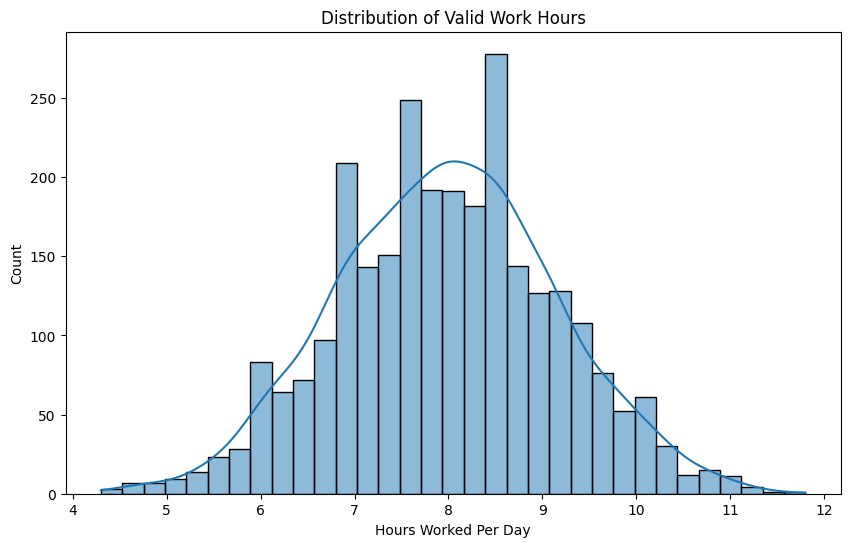

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df_valid_data['hours_worked_per_day'], kde=True)
plt.title('Distribution of Valid Work Hours')
plt.xlabel('Hours Worked Per Day')
plt.show()

# Standard Normal Distribution (SND)

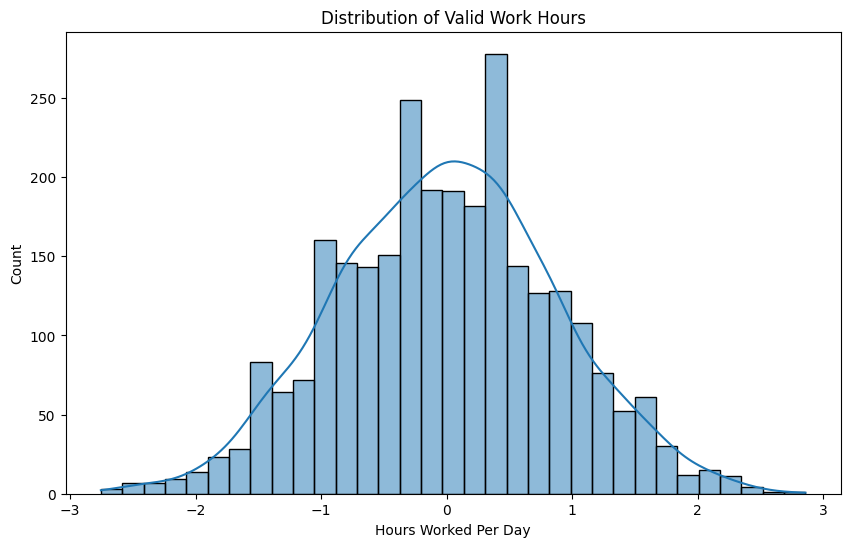

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df_valid_data['Z-Score'], kde=True)
plt.title('Distribution of Valid Work Hours')
plt.xlabel('Hours Worked Per Day')
plt.show()